# <span style="color:blue"> Análisis Exploratorio de datos (EDA)  - Seguridad en Jalisco </span>

## Contenido

 + Fuente de los datos
 + Descripción de los datos
 + Missing Values
 + Limpieza de los datos
 + Visualización de los datos
 + Comentarios finales
 + Referencias

## 1. Fuente de Datos

<div style="text-align: justify"> Los datos se presentan de manera estructurada en un archivo csv 
 y son extráidos de la sección de laboratorio de datos del portal web 
 Plataforma de Seguridad del Instituto de Información Estadística y Geográfica de Jalisco (IIEG), 
 por lo tanto la información es de fuente pública debido a que el Gobierno de Jalisco 
 transparenta la estadística delictiva en la entidad y es presentada de manera interactiva 
 y a través de reportes mensuales. <div>  

## 2. Descripción de los datos

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
from datetime import datetime
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import altair as alt
alt.renderers.enable('default')
import seaborn as sns
import folium

In [2]:
# Carga del dataset
file = "C:/Users/eduri/OneDrive/Documents/Semestre IV/DPII/datos-2023-03-17.csv"
df = pd.read_csv(file)
df.head(3)

,fecha,delito,x,y,colonia,municipio,clave_mun,hora,bien_afectado,zona_geografica
0,01/10/2019,Abuso sexual infantil,-103.310007,20.688949,SANTA MARIA,GUADALAJARA,39,N.D.,La libertad y la seguridad sexual,AMG
1,01/10/2019,Abuso sexual infantil,-103.505518,20.799957,AMPLIACION SANTA LUCIA,ZAPOPAN,120,N.D.,La libertad y la seguridad sexual,AMG
2,01/10/2019,Abuso sexual infantil,-103.297919,20.646023,VICENTE GUERRERO,GUADALAJARA,39,N.D.,La libertad y la seguridad sexual,AMG


In [3]:
#Observamos las columnas
df.columns

Index(['fecha', 'delito', 'x', 'y', 'colonia', 'municipio', 'clave_mun',
       'hora', 'bien_afectado', 'zona_geografica'],
      dtype='object')

El dataset cuenta con 10 variables

In [4]:
#Observamos la información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294316 entries, 0 to 294315
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fecha            294316 non-null  object 
 1   delito           294316 non-null  object 
 2   x                283367 non-null  float64
 3   y                283367 non-null  float64
 4   colonia          294316 non-null  object 
 5   municipio        294316 non-null  object 
 6   clave_mun        294316 non-null  int64  
 7   hora             294316 non-null  object 
 8   bien_afectado    294316 non-null  object 
 9   zona_geografica  294316 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 22.5+ MB


El dataset cuenta con 294,316 registros, es decir, la cantidad de carpetas de investigación por los delitos cometidos en Jalisco.  
Son 7 variables de tipo caracter, 2 flotantes y una variable entera.
Veamos a que corresponde cada variable:

In [5]:
# Se observa los valores unicos de cada una de las variables
df.nunique()

fecha               1520
delito                16
x                  95260
y                  98486
colonia             3077
municipio            126
clave_mun            126
hora                1440
bien_afectado          4
zona_geografica        2
dtype: int64

### Información general de los datos

In [6]:
#fechas
print("- El rango de fechas va desde {0} hasta {1}.".format(df.fecha.unique().min(), df.fecha.unique().max()))

- El rango de fechas va desde 01/01/2019 hasta 31/12/2022.


In [7]:
# Tipo de delitos
print("- Los distintos tipos de delitos en el dataset son:")
for i in df.delito.unique():
    print("    * "+i)

- Los distintos tipos de delitos en el dataset son:
    * Abuso sexual infantil
    * Feminicidio
    * Homicidio doloso
    * Lesiones dolosas
    * Robo a bancos
    * Robo a carga pesada
    * Robo a cuentahabientes
    * Robo a int de vehiculos
    * Robo a negocio
    * Robo a persona
    * Robo a vehiculos particulares
    * Robo casa habitacion
    * Robo de autopartes
    * Robo de motocicleta
    * Violacion
    * Violencia familiar


In [8]:
# Las variables x,y son las longitudes y latitudes de cada uno de los registros
print("-El minimo de longitud de coordenada del dataset es:", min(df.x))
print("-El máximo de longitud de coordenada del dataset es:", max(df.x))
print("-El minimo de latitud de coordenada del dataset es:", min(df.y))
print("-El máximo de latitud de coordenada del dataset es:", max(df.y))


-El minimo de longitud de coordenada del dataset es: -105.5921781
-El máximo de longitud de coordenada del dataset es: -101.553322
-El minimo de latitud de coordenada del dataset es: 18.98513745
-El máximo de latitud de coordenada del dataset es: 22.73658803


In [ ]:
#Colonias 
print("- Nombre de la colonia:")
for i in df.colonia.unique():
    print("    * "+i)

In [ ]:
# municipios
print("- Nombre de los municipios:")
for i in df.municipio.unique():
    print("    * "+i)

#Clave de municipio
print("Clave de los municipios:")
for i in df.clave_mun.unique():
    print("    * "+str(int(i)))

In [9]:
#Existe un ND en las filas
print("- El rango de fechas va desde {0} hasta {1}.".format(df.hora.unique().min(), df.hora.unique().max())) 

- El rango de fechas va desde 00:00 hasta N.D..


In [10]:
# Que segemento fue afectado
print("- Los bienes afectados son:", df.bien_afectado.unique())

- Los bienes afectados son: ['La libertad y la seguridad sexual' 'La vida y la integridad corporal'
 'El patrimonio' 'La familia']


In [11]:
# Zona geografica en Jalisco
print("- La zona geografica del dataset:", df.zona_geografica.unique())

- La zona geografica del dataset: ['AMG' 'Interior']


## 3. Missing Values

In [12]:
df.isna().sum()


fecha                  0
delito                 0
x                  10949
y                  10949
colonia                0
municipio              0
clave_mun              0
hora                   0
bien_afectado          0
zona_geografica        0
dtype: int64

Únicamente se observan valores nulos en las variables de las coordenadas, sin embargo aunque no se muestren valores nulos en las demás variables se logró identificar las siguientes observaciones:
 * En la variable colonia existen unos *NO DISPONIBLES*
 + En la variable hora se encuentra *N.D.*
 + Y en la varibale clave_mun hay un número *999* que no corresponde a ningún municipio

## 4. Limpieza de datos

In [13]:
# Seleccionar el filtro únicamente con los municipios y borrar el 999 que es NO DISPONIBLE
df.drop(df[df['clave_mun'] == 999].index, inplace=True)

#Ahora borrar de la variable colonia el NO DISPONIBLE
df.drop(df[df['colonia'] == 'NO DISPONIBLE'].index, inplace=True)

# Y finalmente borrar el ND de la variable hora
df.drop(df[df['hora'] == 'N.D.'].index, inplace=True)

In [14]:
df.head(3)

,fecha,delito,x,y,colonia,municipio,clave_mun,hora,bien_afectado,zona_geografica
38,14/10/2019,Abuso sexual infantil,-103.299889,20.641185,JARDINES DE LA PAZ,SAN PEDRO TLAQUEPAQUE,98,02:00,La libertad y la seguridad sexual,AMG
77,30/10/2019,Abuso sexual infantil,-103.273903,20.647750,INSURGENTES,GUADALAJARA,39,03:00,La libertad y la seguridad sexual,AMG
84,01/11/2019,Abuso sexual infantil,-103.360971,20.627276,ECHEVERRIA,GUADALAJARA,39,15:00,La libertad y la seguridad sexual,AMG


Ahora el dataset depurado tiene 219,083 registros con las mismas variables ya mencionadas

In [15]:
print("- El rango de fechas va desde {0} hasta {1}.".format(df.hora.unique().min(), df.hora.unique().max()))

- El rango de fechas va desde 00:00 hasta 23:59.


Se ha depurado el rango de horas

In [17]:
# Se ha convertido la fecha en formato internacional ISO
df['fecha'] = pd.to_datetime(df['fecha'])
pd.to_datetime(df.fecha, format = '%Y/%m/%d')

38       2019-10-14
77       2019-10-30
84       2019-01-11
87       2019-04-11
88       2019-04-11
            ...    
293965   2023-11-02
293966   2023-12-02
293967   2023-02-15
293968   2023-02-16
293969   2023-01-02
Name: fecha, Length: 219083, dtype: datetime64[ns]

In [18]:
df.head(3)

,fecha,delito,x,y,colonia,municipio,clave_mun,hora,bien_afectado,zona_geografica
38,2019-10-14,Abuso sexual infantil,-103.299889,20.641185,JARDINES DE LA PAZ,SAN PEDRO TLAQUEPAQUE,98,02:00,La libertad y la seguridad sexual,AMG
77,2019-10-30,Abuso sexual infantil,-103.273903,20.647750,INSURGENTES,GUADALAJARA,39,03:00,La libertad y la seguridad sexual,AMG
84,2019-01-11,Abuso sexual infantil,-103.360971,20.627276,ECHEVERRIA,GUADALAJARA,39,15:00,La libertad y la seguridad sexual,AMG


Ahora que se tienen los datos limpios con formato de fecha ISO y sin ningun nulo y vacios en los datos, se procede a realizar la visualización de los datos con el objetivo de encontrar información útil e indispensable que permita identificar zonas afectadas, tipos de delito e aumento, los bienes afectados y caracteristicas importantes para la elaboración de modelos que posterioremente midan la relación causa-efecto entre factores y el crimen en el Estado de Jalisco

In [19]:
#Exportación de la base de datos depurada y limpia
df.to_csv('data_delitos_clean.csv')

## 5. Visualización de los datos

In [20]:
delitos_tiempo = df.pivot_table(index=["fecha"], values=["delito"],aggfunc='count').reset_index()
delitos_tiempo

,fecha,delito
0,2019-01-01,37
1,2019-01-02,122
2,2019-01-03,119
3,2019-01-04,108
4,2019-01-05,54
...,...,...
1515,2023-10-02,188
1516,2023-11-01,161
1517,2023-11-02,87
1518,2023-12-01,159


In [21]:
alt.Chart(delitos_tiempo).mark_line(interpolate='basis').encode(
    alt.X("fecha:T",title="Periodo"),
    alt.Y('delito:Q', title="Número de delitos")
).properties(
    title="Frecuencia de delitos realizados en Jalisco durante 2019-2023"
).properties(width=500, height=300)

alt.Chart(...)

Se puede observar una tendencia a la alza del incremento de delitos durante el segundo semestre del año 2019 y el primer semestre del 2020 (pandemia de COVID-19), despues vuelve una ligera reducción de delitos durante el resto del 2020, 2021 y 2022.
  
  **Nota**: La libreria realiza una interpolación en los próximos meses**

In [22]:
alt.Chart(delitos_tiempo).transform_density(
    'delito',
    as_=['delito', 'density'],
).mark_area().encode(
    alt.X("delito:Q",title="Delito"),
    alt.Y('density:Q', title="Probabilidad")
).properties(title="Distribución de densidad de delitos")

alt.Chart(...)

La probabilidad en la tendencia de la información se encuentra entre los 180 y 200 delitos.

In [23]:
tipo_delito = df.groupby(['delito']).size().reset_index(name='frecuencia')
tipo_delito

,delito,frecuencia
0,Abuso sexual infantil,2496
1,Feminicidio,172
2,Homicidio doloso,5005
3,Lesiones dolosas,22889
4,Robo a bancos,73
5,Robo a carga pesada,1030
6,Robo a cuentahabientes,1462
7,Robo a int de vehiculos,10704
8,Robo a negocio,30701
9,Robo a persona,36180


In [24]:
# Gráfica autodescriptiva: 
alt.Chart(tipo_delito).mark_bar().encode(
    alt.X("delito:N", sort= '-y',title="Tipo de Delito", bin=False),
    alt.Y('frecuencia:Q', title="Carpetas de investigación"),
    alt.Color('delito', legend=None)
).properties(
    title="Gráfico de barras de número de delitos por tipo de delito (2019-2023)"
)

alt.Chart(...)

En el top 5 de los delitos cometidos se encuentra el **robo a vehiculos particulares**, **violencia familiar**, el robo a personas y negocios y las lesiones dolosas.

In [25]:
bien_afectado = df.groupby(['bien_afectado']).size().reset_index(name='frecuencia')
bien_afectado

,bien_afectado,frecuencia
0,El patrimonio,150815
1,La familia,36443
2,La libertad y la seguridad sexual,3759
3,La vida y la integridad corporal,28066


In [26]:
base=alt.Chart(bien_afectado).encode(
theta=alt.Theta('frecuencia:Q', stack=True),
color=alt.Color('bien_afectado:N', legend=None)
)
pie = base.mark_arc(outerRadius=120)
text = base.mark_text(radius=180, size=13).encode(text='bien_afectado:N')
pie + text

alt.LayerChart(...)

El patrimonio de los Jalisciences se vio fuertemente afectado por los delitos cometidos durante el periodo analizado por el robo de sus pertenencias y enseguida llama la atención la violencia familiar que se presenta en el estado.

In [27]:
zona = df.pivot_table(index=["delito","zona_geografica"], values=["fecha"],aggfunc='count').reset_index()
zona


,delito,zona_geografica,fecha
0,Abuso sexual infantil,AMG,1045
1,Abuso sexual infantil,Interior,1451
2,Feminicidio,AMG,135
3,Feminicidio,Interior,37
4,Homicidio doloso,AMG,4242
5,Homicidio doloso,Interior,763
6,Lesiones dolosas,AMG,15763
7,Lesiones dolosas,Interior,7126
8,Robo a bancos,AMG,68
9,Robo a bancos,Interior,5


In [28]:
plot_1 = alt.Chart(zona).mark_point().encode(
    alt.X("delito:N",title="Tipos de delito"),
    alt.Y("fecha:Q",scale=alt.Scale(type="log"), title="Número delitos"),
    alt.Color("zona_geografica:N",title="Zona geografica"),
    alt.Shape("zona_geografica:N"),
    tooltip=["delito","zona_geografica","fecha"]
).properties(title="Relación del número de delitos y tipo de delitos por zona geografica")

plot_1

alt.Chart(...)

Podemos observar que la mayoria de los delitos se han cometido en la zona metropolitana de Guadalajara por encima de los otros municipios, sin embargo llama la atención que el delito de **abuso sexual infantil** el resto de los municipios se encuentrán por encima del área metropolitana de Guadalajara (una posible causa se puede deber a que en cierto municipios todavía existe el matrimonio de adultos con menores de edad).

In [29]:
top_municipio = df.pivot_table(index=["delito","municipio"], values=["fecha"],aggfunc='count').reset_index()
top_municipio


,delito,municipio,fecha
0,Abuso sexual infantil,ACATIC,4
1,Abuso sexual infantil,ACATLAN DE JUAREZ,10
2,Abuso sexual infantil,AHUALULCO DE MERCADO,9
3,Abuso sexual infantil,AMACUECA,1
4,Abuso sexual infantil,AMATITAN,3
...,...,...,...
1189,Violencia familiar,ZAPOTILTIC,94
1190,Violencia familiar,ZAPOTITLAN DE VADILLO,2
1191,Violencia familiar,ZAPOTLAN DEL REY,15
1192,Violencia familiar,ZAPOTLAN EL GRANDE,262


In [30]:
alt.Chart(
    top_municipio,
).mark_bar().encode(
    x=alt.X('municipio:N', sort='-y'),
    y=alt.Y('fecha:Q', title="Número de delitos"),
    color=alt.Color('fecha:Q', title='delitos')

).transform_window(
    rank='rank(fecha)',
    sort=[alt.SortField('fecha', order='descending')]
).transform_filter(
    (alt.datum.rank < 100)
)

alt.Chart(...)

Y efectivamente observamos que Guadalajara es el municipio con mayor índice de delitos, seguido el municipio de Zapopan, Tonala y Tlajomulco, practicamente municipios del área metropolitana de Guadalajara. 
Esto debido a la mayor cantidad de habitantes que existe en comparación con el resto de la población de Jalisco

In [31]:
df_2 = df.copy(deep=True)
df_2.index = pd.DatetimeIndex(df_2.fecha)

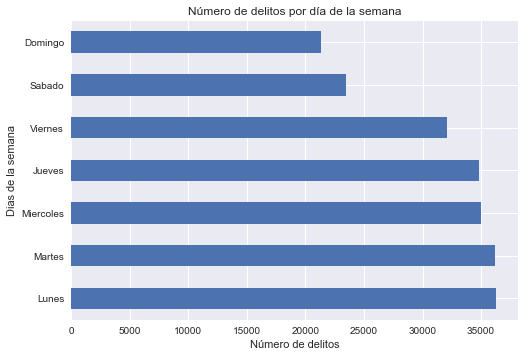

In [32]:
days = ['Lunes','Martes','Miercoles',  'Jueves', 'Viernes', 'Sabado', 'Domingo']
df.groupby([df_2.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Dias de la semana')
plt.yticks(np.arange(7), days)
plt.xlabel('Número de delitos')
plt.title('Número de delitos por día de la semana')
plt.show()

Frecuentemente los delitos ocurrieron a inicios de la semana (martes es el principal dia de la semana con mayor delitos).

In [33]:
horario = df.pivot_table(index=["hora"], values=["fecha"],aggfunc='count').reset_index()
horario

,hora,fecha
0,00:00,3071
1,00:01,113
2,00:02,27
3,00:03,30
4,00:04,8
...,...,...
1433,23:55,102
1434,23:56,13
1435,23:57,9
1436,23:58,19


In [34]:
alt.Chart(horario).mark_bar().encode(
    alt.X("hora:N", sort= '-y',title="Horario de asalto", bin=False),
    alt.Y('fecha:Q', title="Número de carpetas"),
    alt.Color('fecha', legend=None)
).properties(
    title="Gráfico de barras de frecuencia de delitos por horario del día"
).transform_window(
    rank='rank(fecha)',
    sort=[alt.SortField('fecha', order='descending')]
).transform_filter(
    (alt.datum.rank < 20)
)

alt.Chart(...)

Y el horario de la madrugada presento la mayoria de los delitos, siendo los horarios por la noche cuando se presentaron los delitos, es decir, la probabilidad de menor influencia de personas en la calle los delincuentes proceden a realizar el crimen por las ventajas que se presentan en la oscuridad.

#### *Hasta el momento se ha revisado de manera general los tipos de delitos pero que sucede en cada uno de los municipios y colonias del Estado*

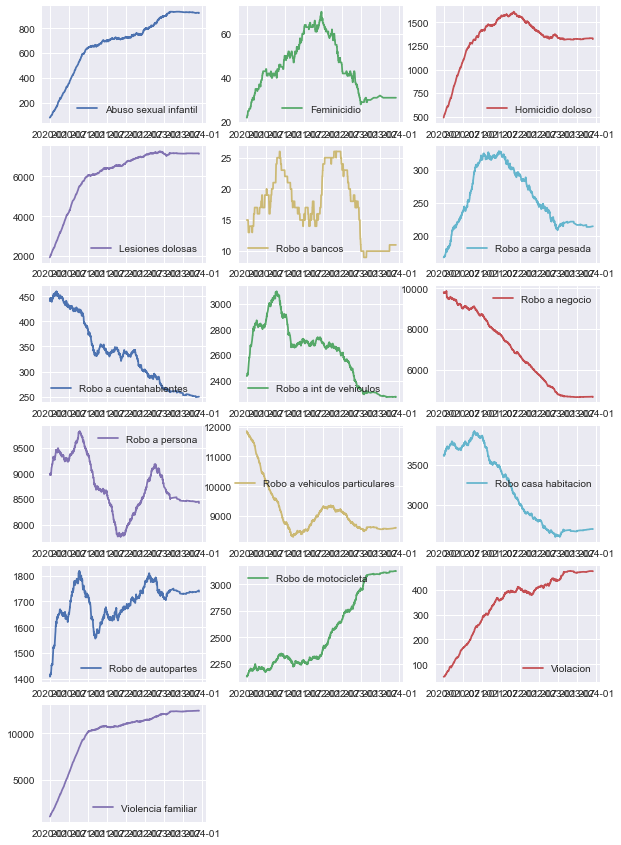

In [36]:
delito_count_date = df_2.pivot_table('fecha', aggfunc=np.size, columns='delito', 
                                    index=df_2.index.date, fill_value=0)
delito_count_date.index = pd.DatetimeIndex(delito_count_date.index)
plot = delito_count_date.rolling(365).sum().plot(figsize=(10, 15), 
                  subplots=True, layout=(-1, 3), sharex=False, sharey=False)

Si existe una reducción en los delitos que son ocasioados a bienes patrimoniales como el robo a vehículos, homocidios, feminicidios (que es una premisa de las que argumente el Gobernador de Jalisco, Enrique Alfaro), sin embargo en temas de **Violación, Violencia Familiar, Abuso sexual a menores, lesiones dolosas**, son delitos cometidos hacia la persona y su integridad. Estos han presentado un aumento generalizo en los últimos meses generando preocupación por parte de los ciudadanos jalisciences. 

La intención es revisar dos de los delitos cometidos hacia la integridad de la persona como lo son la  Violencia Familiar y la Violación, identificando las zonas mayormente perjudicadas por estos crimenes.

#### <span style="color:blue"> Delitos de Violencia Familiar por municipio y colonias del Estado de Jalisco </span>

In [57]:
#from folium import plugins
#data_j = df[df['delito']=='Violencia familiar']
#jalisco_map = folium.Map(location=[20.34, -102.91],zoom_start =5)
#data_loc= data_j[['y','x']].values
#data_loc =data_loc.tolist()
#hm = plugins.HeatMap(data_loc)
#hm.add_to(jalisco_map)
#jalisco_map

El delito de violencia familiar es mostrado a través de este mapa de calor detectando que la AMG es abarcada en su totalidad por dicho crimen

#####  <span style="color:blue"> Delitos de Violación por municipio y colonia del Estado de Jalisco </span>

In [51]:
#data_j = df[df['delito']=='Violacion']
#jalisco_map = folium.Map(location=[20.34, -102.91],zoom_start =5)
#data_loc= data_j[['y','x']].values
#data_loc =data_loc.tolist()
#hm = plugins.HeatMap(data_loc)
#hm.add_to(jalisco_map)
#jalisco_map

El mismo caso de la violación es denotada en el área metropolitana de Guadalajara, dando hincapie a que la mayor parte de los delitos se cometen en áreas urbanas y alrededores 

##### <span style="color:blue"> Delitos de Abuso sexual infantil por municipio y colonia del Estado de Jalisco </span>

In [50]:
#data_j = df[df['delito']=='Abuso sexual infantil']
#jalisco_map = folium.Map(location=[20.34, -102.91],zoom_start =5)
#data_loc= data_j[['y','x']].values
#data_loc =data_loc.tolist()
#hm = plugins.HeatMap(data_loc)
#hm.add_to(jalisco_map)
#jalisco_map

Anteriormente analizamos que el delito de **abuso sexual infantil** es uno de los menos cometidos en comparativa con los demás pero tiene una fuerte influencia en los municipios que no son el AMG y es un delito que va en aumento por lo que se debe considerar y poner atención

In [54]:
#delitos_zmg = df[(df['delito']=='Violencia familiar') & (df['zona_geografica']=='AMG') & (df['municipio']=='ZAPOPAN')]
#delitos_zmg

##### <span style="color:blue"> Delitos de violencia familiar en las colonias de Zapopan </span>

In [53]:
#delito_zapopan = delitos_zmg.pivot_table(index=["colonia"], values=["fecha"],aggfunc='count').reset_index()
#delito_zapopan

In [52]:
#alt.Chart(
    #delito_zapopan,
#).mark_bar().encode(
    #x=alt.X('colonia:N', sort='-y'),
    #y=alt.Y('fecha:Q', title="Número de delitos"),
    #color=alt.Color('fecha:Q', title="delitos")
#).transform_window(
    #rank='rank(fecha)',
    #sort=[alt.SortField('fecha', order='descending')]
#).transform_filter(
    #(alt.datum.rank < 20)
#)

Observamos que en el municipio de Zapopan las colonias con mayor registro de delitos en violencia familiar: son Valle de los Molinos (Que se encuentra al norte y afueras de la ciudad), Miramar y Constitución

##### <span style="color:blue"> Delitos de violaciones en las colonias de Guadalajara </span>

In [44]:
#delitos_zmg = df[(df['delito']=='Violacion') & (df['zona_geografica']=='AMG') & (df['municipio']=='GUADALAJARA')]
#delitos_zmg

In [55]:
#delito_gdl = delitos_zmg.pivot_table(index=["colonia"], values=["fecha"],aggfunc='count').reset_index()
#delito_gdl

In [56]:
#alt.Chart(
    #delito_gdl,
#).mark_bar().encode(
    #x=alt.X('colonia:N', sort='-y'),
    #y=alt.Y('fecha:Q', title="Número de delitos"),
    #color=alt.Color('fecha:Q', title="delitos")

#).transform_window(
    #rank='rank(fecha)',
    #sort=[alt.SortField('fecha', order='descending')]
#).transform_filter(
    #(alt.datum.rank < 20)
#)

Las colonias que presentan mayor índice de violaciones a personasson: Oblatos, Zona Centro y Rancho Nuevo.

#### <span style="color:blue"> Delitos de abuso sexual infantil en los municipios fuera de la AMG </span>

In [47]:
delitos_int = df[(df['delito']=='Abuso sexual infantil') & (df['zona_geografica']=='Interior')]
#delitos_int

In [48]:
delito_int = delitos_int.pivot_table(index=["municipio"], values=["fecha"],aggfunc='count').reset_index()
#delito_int

In [49]:
alt.Chart(
    delito_int,
).mark_rect().encode(
    x=alt.X('municipio:N', sort='-y'),
    y=alt.Y('fecha:Q', title="Número de delitos"),
    color=alt.Color('fecha:Q', title="delitos")

).transform_window(
    rank='rank(fecha)',
    sort=[alt.SortField('fecha', order='descending')]
).transform_filter(
    (alt.datum.rank < 30)
)

alt.Chart(...)

Puerto Vallarta arrebasa a los demás municipios fuera de la AMG. Se necesita implementar medidas para la prevención de este delito en dicho municipio.

## 6. Comentarios Finales

<div style="text-align: justify">  El presente trabajo tuvo como objetivo promover una sugerencia como punto de partida para la recopilación, organización, limpieza, procesamiento, sistematización y visualización de los datos; permitiendo la identificación, mapeo y georreferenciación de los delitos (Violencia familiar, robo a vehículos, robo a personas, abuso sexual infantil, entre otros) y cuestionarse si realemte existe un impacto positivo por reducir la inseguridad en el estado, debido a que la estrategia de seguridad carece de políticas, de planeación sobre el modelo policial y de reflexión ante el avance del crimen organizado en el control del territorio jalisciense.
Lo realmente grato de todos estos estudios es saber que estos temas son del interés de  grandes investigadores. Y, aunque algunos nos son determinantes para definir las causas  delictivas, sí que son una buena herramienta para tomar decisiones y distribuir de forma  adecuada los ingresos que se destinan al combate del crimen con base a programas integrales para prevenir, atender y sancionar a quienes cometen delitos. Academicos insisten en la idea de programas académicos que ofrezcan un cambio de perspectiva, para generar constructores de paz y seguridad que coordinen lo público, lo privado, la academia, con mirada histórica, internacionalista e integral. <div>

## 7. Referencias

+ https://www.udg.mx/es/noticia/politica-de-seguridad-en-jalisco-entre-la-violencia-endemica-y-la-sumision-al-crimen#:~:text=En%20el%20periodo%20de%202015,primer%20lugar%20en%20el%20pa%C3%ADs.

+ BECKER, Gary. S. 1968. Crime and Punishment: An Economic Approach. Journal of Political Economy. Reprinted in Chicago Studies in Political Economy, edited by G.J.Stigler. Chicago and London: The University of Chicago Press, 1988.

+ https://iieg.gob.mx/ns/page_id=22174#:~:text=De%20acuerdo%20con%20el%20Secretariado,Fiscal%C3%ADas%20Generales%20de%20las%20entidades

+ Rock, Paul (1997), “Sociological Theories of Crime”, en Mike Maguire, Rod Morgan y Robert Reiner (eds.), The Oxford Handbook of Criminology, Oxford, Oxford University Press. 

+ Jessop, Bob (2006), “Political Economy”, en S. Bryan Turner (ed.), The Cambridge Disctionary of Sociology, Nueva York, Cambridge University Press.